<a href="https://colab.research.google.com/github/vbs30/Basket-Trends-Understanding-Consumer-s-Choice/blob/master/MBA_new1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
import networkx as nx
%matplotlib inline
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [ ]:
myretaildata = pd.read_csv('Online_retail (1).csv')
myretaildata.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536370,22728,Milk,24,01-12-2010 08:45,3.75,12583.0,India
1,536370,22727,Butter,24,01-12-2010 08:45,3.75,12583.0,India
2,536370,22726,Bread,12,01-12-2010 08:45,3.75,12583.0,India
3,536370,21724,Almonds,12,01-12-2010 08:45,0.85,12583.0,India
4,536370,21883,Chana dal,24,01-12-2010 08:45,0.65,12583.0,India


In [ ]:
myretaildata['Description'] = myretaildata['Description'].str.strip()
myretaildata.dropna(axis=0, subset=['InvoiceNo'], inplace=True)
myretaildata['InvoiceNo'] = myretaildata['InvoiceNo'].astype('str')
myretaildata = myretaildata[~myretaildata['InvoiceNo'].str.contains('C')]
myretaildata.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536370,22728,Milk,24,01-12-2010 08:45,3.75,12583.0,India
1,536370,22727,Butter,24,01-12-2010 08:45,3.75,12583.0,India
2,536370,22726,Bread,12,01-12-2010 08:45,3.75,12583.0,India
3,536370,21724,Almonds,12,01-12-2010 08:45,0.85,12583.0,India
4,536370,21883,Chana dal,24,01-12-2010 08:45,0.65,12583.0,India


In [ ]:
myretaildata['Country'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


India    7760
Name: Country, dtype: int64

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
mybasket = (myretaildata[myretaildata['Country'] =="India"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
mybasket.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(380, 1525)

In [ ]:
mybasket

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,...,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,Yonex Badminton Racket,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,colouring book
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0
537463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580986,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
def my_encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

my_basket_sets = mybasket.applymap(my_encode_units)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
my_basket_sets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,...,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,Yonex Badminton Racket,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,colouring book
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536370,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536852,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536974,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537065,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
537463,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580986,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581171,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
my_frequent_itemsets = apriori(my_basket_sets, min_support=0.07, use_colnames=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [ ]:
# my_frequent_itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
my_rules = association_rules(my_frequent_itemsets, metric="lift", min_threshold=3)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
my_rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Butter),(Bread),0.094737,0.102632,0.076316,0.805556,7.849003,0.066593,4.615038,0.963913
1,(Bread),(Butter),0.102632,0.094737,0.076316,0.743590,7.849003,0.066593,3.530526,0.972394
2,(Milk),(Bread),0.102632,0.102632,0.073684,0.717949,6.995398,0.063151,3.181579,0.955069
3,(Bread),(Milk),0.102632,0.102632,0.073684,0.717949,6.995398,0.063151,3.181579,0.955069
4,(Butter),(Milk),0.094737,0.102632,0.071053,0.750000,7.307692,0.061330,3.589474,0.953488
5,(Milk),(Butter),0.102632,0.094737,0.071053,0.692308,7.307692,0.061330,2.942105,0.961877
6,(Poster colour),(Drawing pencil),0.176316,0.144737,0.092105,0.522388,3.609227,0.066586,1.790707,0.877681
7,(Drawing pencil),(Poster colour),0.144737,0.176316,0.092105,0.636364,3.609227,0.066586,2.265132,0.845275
8,(colouring book),(Drawing pencil),0.173684,0.144737,0.105263,0.606061,4.187328,0.080125,2.171053,0.921178
9,(Drawing pencil),(colouring book),0.144737,0.173684,0.105263,0.727273,4.187328,0.080125,3.029825,0.890000


In [ ]:
my_basket_sets['Milk'].sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


39

In [ ]:
my_basket_sets['Bread'].sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


39

In [ ]:
my_rules[ (my_rules['lift'] >= 3) &
       (my_rules['confidence'] >= 0.3) ]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Butter),(Bread),0.094737,0.102632,0.076316,0.805556,7.849003,0.066593,4.615038,0.963913
1,(Bread),(Butter),0.102632,0.094737,0.076316,0.743590,7.849003,0.066593,3.530526,0.972394
2,(Milk),(Bread),0.102632,0.102632,0.073684,0.717949,6.995398,0.063151,3.181579,0.955069
3,(Bread),(Milk),0.102632,0.102632,0.073684,0.717949,6.995398,0.063151,3.181579,0.955069
4,(Butter),(Milk),0.094737,0.102632,0.071053,0.750000,7.307692,0.061330,3.589474,0.953488
5,(Milk),(Butter),0.102632,0.094737,0.071053,0.692308,7.307692,0.061330,2.942105,0.961877
6,(Poster colour),(Drawing pencil),0.176316,0.144737,0.092105,0.522388,3.609227,0.066586,1.790707,0.877681
7,(Drawing pencil),(Poster colour),0.144737,0.176316,0.092105,0.636364,3.609227,0.066586,2.265132,0.845275
8,(colouring book),(Drawing pencil),0.173684,0.144737,0.105263,0.606061,4.187328,0.080125,2.171053,0.921178
9,(Drawing pencil),(colouring book),0.144737,0.173684,0.105263,0.727273,4.187328,0.080125,3.029825,0.890000


In [ ]:
product_of_interest = 'DRAWING PENCIL'

# Filter association rules based on the product of interest
product_rules = my_rules[(my_rules['antecedents'].apply(lambda x: product_of_interest in x))
                     & ~(my_rules['consequents'].apply(lambda x: product_of_interest in x))]

if product_rules.empty:
    print('No suggestion available for', product_of_interest)
else:
    # Sort the association rules by lift and select the top consequent products
    suggested_products = product_rules.sort_values(by='lift', ascending=False).iloc[:5]['consequents'].tolist()
    print('For product: ', product_of_interest, ', you may also like:')
    for product in suggested_products:
        print(product)

No suggestion available for DRAWING PENCIL


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:508:

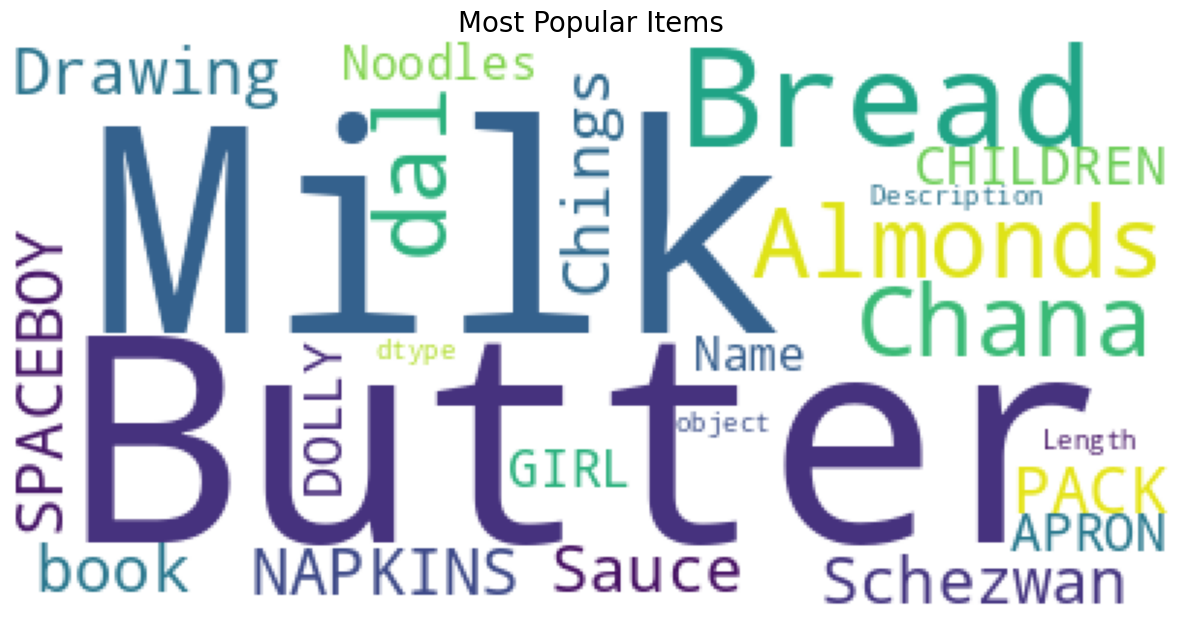

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

plt.rcParams['figure.figsize'] = (15, 15)
wordcloud = WordCloud(background_color = 'white',  max_words = 121).generate(str(myretaildata['Description']))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Items',fontsize = 20)
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


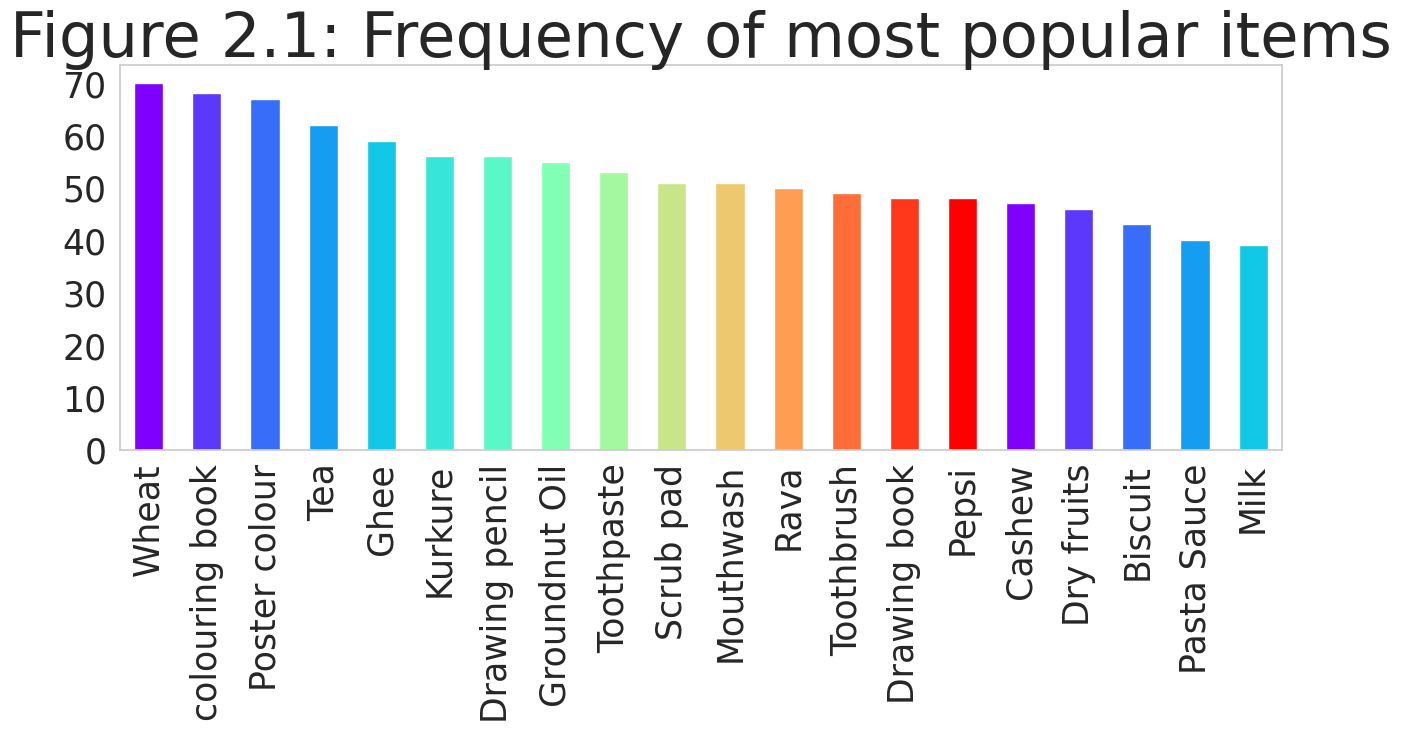

In [ ]:
plt.rcParams['figure.figsize'] = (15,5)
color = plt.cm.rainbow(np.linspace(0, 1, 15))
myretaildata['Description'].value_counts().head(20).plot.bar(color = color, fontsize = 25)
plt.title('Figure 2.1: Frequency of most popular items', fontsize = 45)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

# New Section

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:29: DeprecationWarning: invalid escape sequence '\d'
<>:29: DeprecationWarning: invalid escape sequence '\d'
<ipython-input-34-47e796f55dfa>:29: DeprecationWarning: invalid escape sequence '\d'
  if re.compile("^[R]\d+$").fullmatch(node) != None:


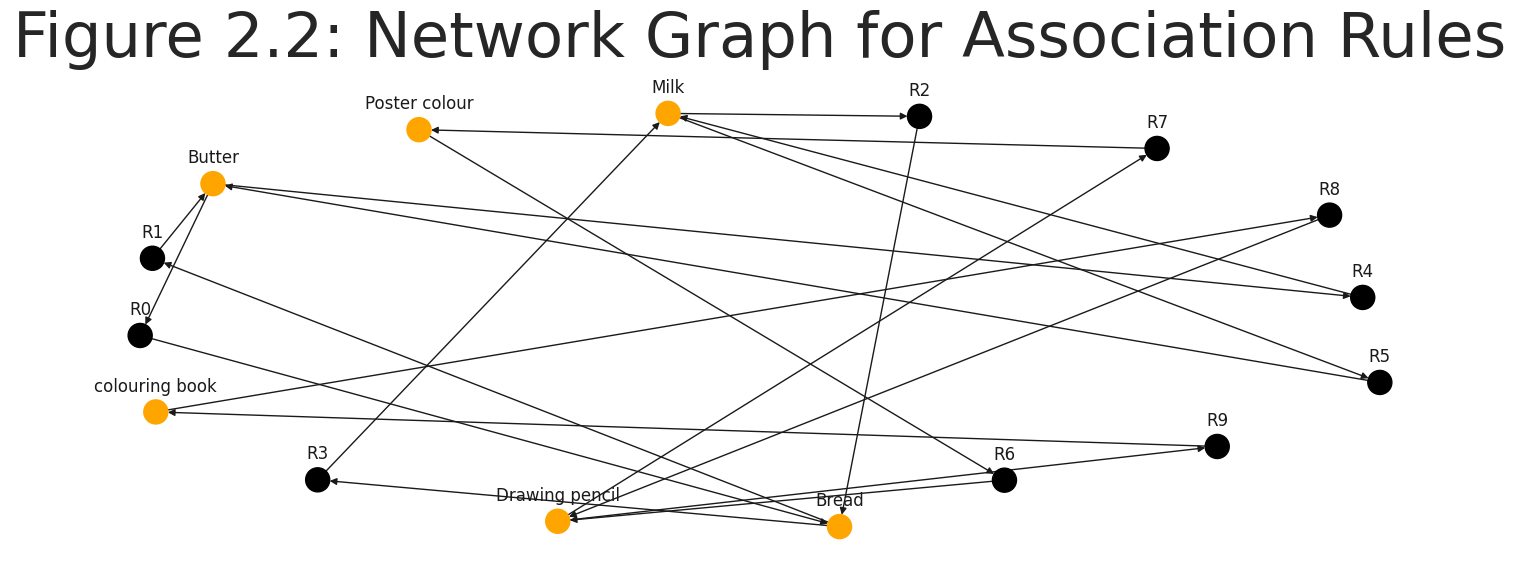

In [ ]:
#Another type of visualizations to look at the relationship between the products is via Network Graph.
#Let’s define a function to draw a network graph which can specify how many rules we want to show.

import re

def draw_network(rules, rules_to_show):
  # Directional Graph from NetworkX
  network = nx.DiGraph()

  # Loop through number of rules to show
  for i in range(rules_to_show):

    # Add a Rule Node
    network.add_nodes_from(["R"+str(i)])
    for antecedents in rules.iloc[i]['antecedents']:
        # Add antecedent node and link to rule
        network.add_nodes_from([antecedents])
        network.add_edge(antecedents, "R"+str(i),  weight = 2)

    for consequents in rules.iloc[i]['consequents']:
        # Add consequent node and link to rule
        network.add_nodes_from([consequents])
        network.add_edge("R"+str(i), consequents,  weight = 2)

  color_map=[]

  # For every node, if it's a rule, colour as Black, otherwise Orange
  for node in network:
       if re.compile("^[R]\d+$").fullmatch(node) != None:
            color_map.append('black')
       else:
            color_map.append('orange')

  # Position nodes using spring layout
  pos = nx.spring_layout(network, k=16, scale=1)
  # Draw the network graph
  nx.draw(network, pos, node_color = color_map, font_size=8)

  # Shift the text position upwards
  for p in pos:
      pos[p][1] += 0.12

  nx.draw_networkx_labels(network, pos)
  plt.title("Figure 2.2: Network Graph for Association Rules", fontsize = 45)
  plt.show()

draw_network(my_rules, 10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


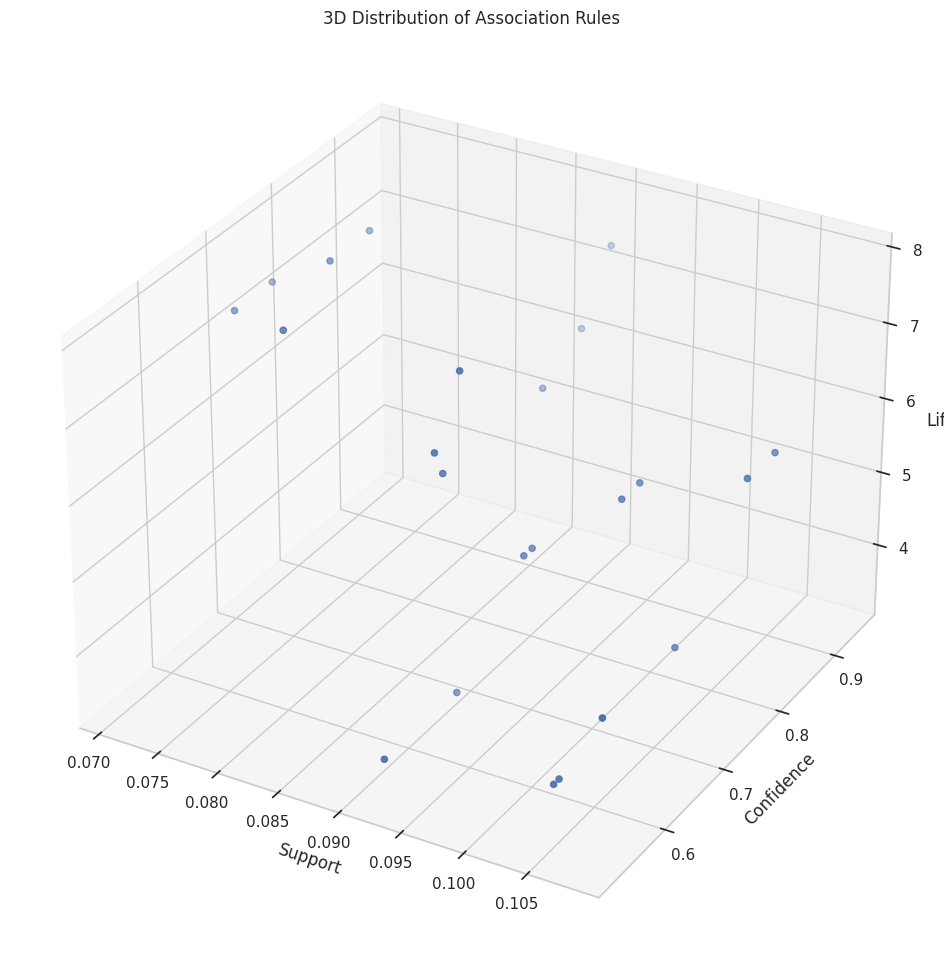

In [ ]:
#To visualize our association rules, we can plot them in a 3D scatter plot.
#Rules that are closer to top right are the rules that can be the most meaningful to be further dived in.

sns.set(style = "whitegrid")
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection = '3d')


x = my_rules['support']
y = my_rules['confidence']
z = my_rules['lift']

ax.set_xlabel("Support")
ax.set_ylabel("Confidence")
ax.set_zlabel("Lift")

ax.scatter(x, y, z)
ax.set_title("3D Distribution of Association Rules")

plt.show()